In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
from scipy import stats

In [2]:
file = "movies.xls"
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3]) 
#concatenate sheets to make them into 1 dataframe 

In [3]:
movies


,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,D.W. Griffith,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,Harry F. Millarde,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,King Vidor,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1


In [4]:
movies.corr()

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Year,1.000000,-0.135038,0.159973,0.045726,0.030886,-0.063820,0.086873,0.101890,0.096137,0.109971,0.218678,0.061504,0.007397,-0.003147,0.275707,-0.209167
Duration,-0.135038,1.000000,-0.090071,0.074276,0.250298,0.173296,0.088449,0.131673,0.123558,0.123074,0.196605,0.013469,0.314765,0.328403,0.258486,0.261662
Aspect Ratio,0.159973,-0.090071,1.000000,0.006598,0.069346,0.001642,-0.020049,-0.007783,-0.003366,-0.017885,0.025737,0.013713,-0.014761,-0.024719,-0.049786,0.059445
Budget,0.045726,0.074276,0.006598,1.000000,0.102179,0.021090,0.022639,0.044236,0.047451,0.036557,0.062039,-0.019559,0.079621,0.084292,0.119994,0.030688
Gross Earnings,0.030886,0.250298,0.069346,0.102179,1.000000,0.144945,0.154468,0.262768,0.308026,0.247400,0.378082,-0.027755,0.637271,0.559958,0.480601,0.198021
Facebook Likes - Director,-0.063820,0.173296,0.001642,0.021090,0.144945,1.000000,0.090707,0.119587,0.120199,0.119532,0.162036,-0.041297,0.297045,0.221890,0.180674,0.170834
Facebook Likes - Actor 1,0.086873,0.088449,-0.020049,0.022639,0.154468,0.090707,1.000000,0.390466,0.249927,0.951660,0.135320,0.072204,0.192763,0.145461,0.190016,0.076153
Facebook Likes - Actor 2,0.101890,0.131673,-0.007783,0.044236,0.262768,0.119587,0.390466,1.000000,0.559662,0.628389,0.243464,0.071177,0.270755,0.219496,0.282306,0.083860
Facebook Likes - Actor 3,0.096137,0.123558,-0.003366,0.047451,0.308026,0.120199,0.249927,0.559662,1.000000,0.473920,0.278844,0.099368,0.287239,0.230189,0.271646,0.052633
Facebook Likes - cast Total,0.109971,0.123074,-0.017885,0.036557,0.247400,0.119532,0.951660,0.628389,0.473920,1.000000,0.209754,0.091410,0.265865,0.206923,0.263203,0.085854


In [7]:
#check if there are nans 
movies["Reviews by Users"].isnull().values.any()

True

In [9]:
movies["Reviews by Crtiics"].isnull().values.any()

True

In [15]:
#drop nans in the target columns 
movies_dropna = movies.dropna(subset = ["Reviews by Users","Reviews by Crtiics"])

In [16]:
slope, intercept, r_value, p_value, std_err = stats.linregress(movies_dropna["Reviews by Users"],movies_dropna["Reviews by Crtiics"])

In [17]:
#slope 
slope

0.1957621333029293

In [18]:
intercept

86.4938919682308

Text(3000, 600, 'y = 0.196x+86.49')

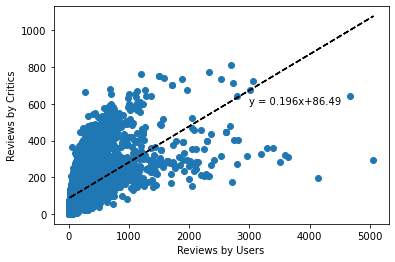

In [23]:
plt.plot(movies_dropna["Reviews by Users"], slope*movies_dropna["Reviews by Users"]+intercept, 'k--') # y = mx+b
plt.scatter(movies_dropna["Reviews by Users"],movies_dropna["Reviews by Crtiics"])
plt.xlabel('Reviews by Users')
plt.ylabel('Reviews by Critics')
plt.annotate("y = 0.196x+86.49",(3000,600))

In [22]:
np.corrcoef(movies_dropna["Reviews by Users"],movies_dropna["Reviews by Crtiics"])

array([[1.        , 0.60938659],
       [0.60938659, 1.        ]])

In [27]:
import statsmodels.api as sm

In [25]:
#USing OLS 
#Set our X and Y data 
X = movies_dropna["Reviews by Users"]
y = movies_dropna["Reviews by Crtiics"]

In [28]:
#add column of constants to Xdata 
X=sm.add_constant(X)

In [29]:
model = sm.OLS(y, X).fit()

In [30]:
predictions = model.predict(X)

In [31]:
X

,const,Reviews by Users
Title,,
Intolerance: Love's Struggle Throughout the Ages,1.0,88.0
Over the Hill to the Poorhouse,1.0,1.0
The Big Parade,1.0,45.0
Metropolis,1.0,413.0
Pandora's Box,1.0,84.0
...,...,...
War & Peace,1.0,44.0
Wings,1.0,56.0
Wolf Creek,1.0,6.0


Text(0, 0.5, 'Reviews by Critics')

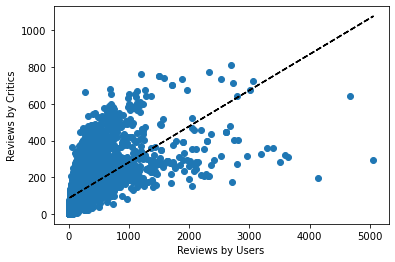

In [32]:
plt.plot(X["Reviews by Users"],predictions, 'k--')
plt.scatter(movies_dropna["Reviews by Users"],movies_dropna["Reviews by Crtiics"])
plt.xlabel('Reviews by Users')
plt.ylabel('Reviews by Critics')

In [34]:
model.params

const               86.493892
Reviews by Users     0.195762
dtype: float64